# The Cauchy distribution

The Cauchy distribution has the PDF:

$$
f(x; x_0,\gamma) = \frac{1}{\pi\gamma \left[1 + \left(\frac{x - x_0}{\gamma}\right)^2\right]}
$$

where $x_0$ is the location parameter, specifying the location of the peak of the distribution, and $\gamma>0$ is the scale parameter.

The CDF of the Cauchy distribution is:

$$
F(x; x_0,\gamma)=\frac{1}{\pi} \arctan\left(\frac{x-x_0}{\gamma}\right)+\frac{1}{2}
$$

Let $z$ be the standardized variable:
$$
z = \frac{x - x_0}{\gamma}.
$$

The inverse equation is:
$$
x = x_0 + \gamma z.
$$

Given $p \in [0, 1]$, the quantile $z$ is the solution of the equation:
$$
\frac{1}{\pi} \arctan(z)+\frac{1}{2} = p.
$$
The solution is:
$$
z = \tan\left(\pi \left(p - \frac{1}{2}\right)\right).
$$
The complementary quantile is the solution of the equation:
$$
\frac{1}{\pi} \arctan(z)+\frac{1}{2} = 1 - p.
$$
The solution is:
$$
z = \tan\left(\pi \left(\frac{1}{2} - p\right)\right).
$$


In [1]:
import numpy as np
import openturns as ot
import time

In [2]:
class Cauchy(ot.PythonDistribution):
    def __init__(self, location=0.0, scale=1.0):
        super(Cauchy, self).__init__(1)
        self.location = location
        self.scale = scale

    def computeCDF(self, x):
        u = x[0]
        xi = (u - self.location) / self.scale
        p = np.arctan(xi) / np.pi + 0.5
        return p

    def computePDF(self, x):
        u = x[0]
        xi = (u - self.location) / self.scale
        y = 1.0 / (np.pi * self.scale * (1.0 + xi ** 2))
        return y

    def getRange(self):
        epsilon = ot.ResourceMap.GetAsScalar("Distribution-DefaultCDFEpsilon")
        z_min = np.tan(np.pi * (epsilon - 0.5))
        x_min = self.location + self.scale * z_min
        z_max = np.tan(np.pi * (0.5 - epsilon))
        x_max = self.location + self.scale * z_max
        return ot.Interval(x_min, x_max)

    def computeQuantile(self, prob, tail=False):
        if tail:
            z = np.tan(np.pi * (0.5 - prob))
        else:
            z = np.tan(np.pi * (prob - 0.5))
        x = self.location + self.scale * z
        return [x]

In [3]:
X = ot.Distribution(Cauchy())
X.getRange()

class=Interval name=Unnamed dimension=1 lower bound=class=Point name=Unnamed dimension=1 values=[-3.18781e+13] upper bound=class=Point name=Unnamed dimension=1 values=[3.18781e+13] finite lower bound=[1] finite upper bound=[1]

In [4]:
palette = [
    "dodgerblue3",
    "darkorange1",
    "forestgreen",
    "firebrick3",
    "mediumpurple3",
    "lightsalmon4",
    "orchid",
    "gray50",
    "goldenrod3",
    "turquoise3",
]

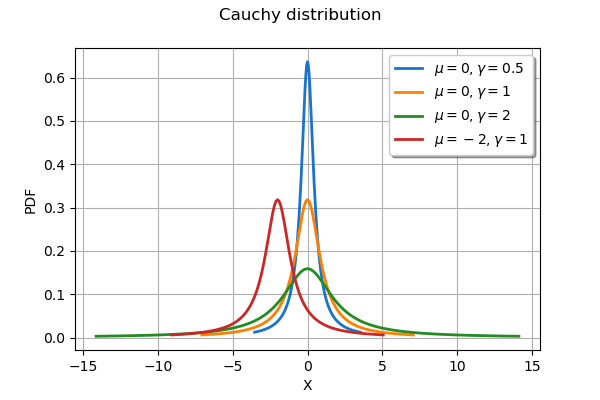

In [5]:
graph = ot.Graph("Cauchy distribution", "X", "PDF", True)
curve = ot.Distribution(Cauchy(0.0, 0.5)).drawPDF()
graph.add(curve)
curve = ot.Distribution(Cauchy(0.0, 1.0)).drawPDF()
graph.add(curve)
curve = ot.Distribution(Cauchy(0.0, 2.0)).drawPDF()
graph.add(curve)
curve = ot.Distribution(Cauchy(-2.0, 1.0)).drawPDF()
graph.add(curve)
graph.setColors(palette[0:4])
graph.setLegends(
    [
        r"$\mu=0,\gamma=0.5$",
        r"$\mu=0,\gamma=1$",
        r"$\mu=0,\gamma=2$",
        r"$\mu=-2,\gamma=1$",
    ]
)
graph.setLegendPosition("topright")
graph

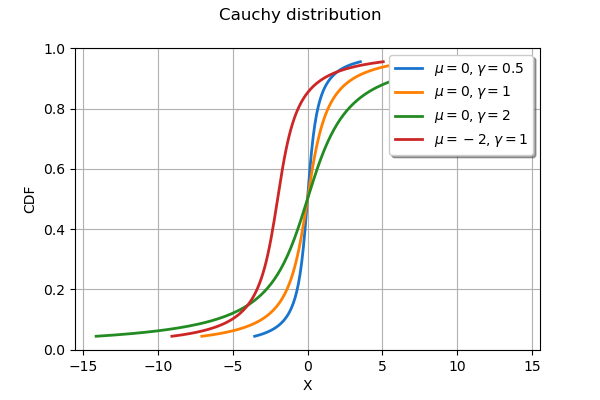

In [6]:
graph = ot.Graph("Cauchy distribution", "X", "CDF", True)
curve = ot.Distribution(Cauchy(0.0, 0.5)).drawCDF()
graph.add(curve)
curve = ot.Distribution(Cauchy(0.0, 1.0)).drawCDF()
graph.add(curve)
curve = ot.Distribution(Cauchy(0.0, 2.0)).drawCDF()
graph.add(curve)
curve = ot.Distribution(Cauchy(-2.0, 1.0)).drawCDF()
graph.add(curve)
graph.setColors(palette[0:4])
graph.setLegends(
    [
        r"$\mu=0,\gamma=0.5$",
        r"$\mu=0,\gamma=1$",
        r"$\mu=0,\gamma=2$",
        r"$\mu=-2,\gamma=1$",
    ]
)
graph.setLegendPosition("topright")
graph

In [7]:
start = time.time()
sample_size = 100000
sample = X.getSample(sample_size)
stop = time.time()
elapsed = stop - start
print("Elapsed =", elapsed, "sample_size=", sample_size)

Elapsed = 0.4125232696533203 sample_size= 100000
